In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
# from sklearn.feature_extraction import text
import heapq

import seaborn as sns
import matplotlib.pyplot as plt

# Project Summary

Provide a clear explanation of:
  1. What this project is about
     - Clearly state the ML type (supervised/unsupervised)
  2. The goal of the project
     - E.g. why it’s important, what goal you want to achieve, or want to learn.

# Data Summary

Data Source:
1. Identify where the data came from (using the APA format)
2. Explain how the dataset was gathered (via API, csv, etc.)

Data Description:
1. Create a table to provide a description of each feature (at least some key features if too many)
2. Print out the results of df.info() to display:
   1. Number of samples/rows and the number of features/columns
   2. Data types of each feature (or just a summary if too many features- e.g. 10 categorical, 20 numeric features)
   3. Bytesize (if a huge file)

Univariate Visualizations (provide clear explanations of what the purpose of each visualization is):
1. Missing values heatmap to identify:
   1. Imbalances between features
   2. Which features need to have missing data imputed or even have the feature dropped completely
2. Duplicate values heatmap to identify where rows are duplicated
3. Boxplots and/or histograms of numerical features to identify:
   1. How the distributions of each feature compare to each other
   2. Where outliers exist
4. For categorical features create a bar chart of the frequency/count of occurance for each category

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to describe the dataset
2. Identify any insights/findings made while describing the dataset
3. Give a brief description of what the next step will be in the analysis (data cleaning)

# Data Cleaning

Data cleaning (provide clear explanations of why each step is being applied to the dataset):
1. Convert data types
2. Create new columns that will help with the analysis such as:
   1. Adding datetime features (year, month, day, quarter, date, etc.)
   2. Pivoting columns
   3. Grouping rows by features
3. Renaming column headers
4. Filter/subset the dataset
5. Apply methods to imputing missing values, or drop the feature altogether if its not important to the analysis
6. Apply methods to remove outliers

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (EDA)

# EDA

Multivariate Visualizations (Using colors, size, or faceted by categories where applicable. Also provide clear explanations of what the purpose of each visualization is):
   1. Correlation matrix
   2. Bi-variate histograms (i.e. sns.pairplot())
   3. Scatter plots
   4. Line charts

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (Modeling)

# Modeling

- Use multiple (appropriate) ML models
  - use models not covered in class
  - Is the choice of model(s) appropriate for the problem?
- Interaction/collinearity between features
  - Is there interaction/collinearity between features that can be a problem for the choice of the model?
  - Does the author properly treat if there is interaction or collinearity (e.g., linear regression)? Or does the author confirm that there is no such effect with the choice of the model?
- Feature importance
  - Investigate which features are important by looking at feature rankings or importance from the model
- Hyperparameter tuning
- Managing data imbalance
  - Regularization or other training techniques such as cross validation, oversampling/undersampling/SMOTE or similar for managing data imbalance

# Results and Analysis

- A summary of results and analysis which includes:
  1. Proper visualizations (E.g., tables, graphs/plots, heat maps, statistics summary with interpretation, etc.)
  2. Use various evaluation metrics (E.g., if your data is imbalanced, there are other metrics (F1, ROC, or AUC) that are better than mere accuracy).
     1. Explain why they chose the metric?
  3. Iterate the training and evaluation process and improve the performance
     1.  Address selecting features through the iteration process
  4. Compare the results from the multiple models and make appropriate comparisons

# Discussion & Conclusion

1. Learning and takeaways
2. Why something didn’t work
3. Suggest ways to improve

# STEP 1

### 1.1 Load the training dataset

In [2]:
# Load the training data
raw_train_df = pd.read_csv('./BBC News Train.csv')

### 1.2 Training Set EDA

##### 1.2.1 - Check the training dataset's shape and it's columns datatypes:

In [3]:
# Dataset shape
print(f'Dataset shape: Rows = {raw_train_df.shape[0]}, Columns = {raw_train_df.shape[1]}\n')

# Column types
raw_train_df.info()

Dataset shape: Rows = 1490, Columns = 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


##### 1.2.2 - Print out the first 10 rows to get a sense of what the training dataset looks like:

In [4]:
# Display the first 10 rows
raw_train_df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


##### 1.2.3 - Determine the number of unique values in the `Category` column, and then check for duplicated values in the `ArticleID` and `Text` columns.

In [24]:
# Display the number of unique categories
unique_topics = raw_train_df['Category'].unique()
print(f'Unique Categories:\n {unique_topics}\n')

# Check for duplicated values in the ArticleId and Text columns
print(f'Count of Duplicated Values:\n  ArticleId column = {raw_train_df['ArticleId'].duplicated().sum()}\n  Text column = {raw_train_df['Text'].duplicated().sum()}\n')

Unique Categories:
 ['business' 'tech' 'politics' 'sport' 'entertainment']

Count of Duplicated Values:
  ArticleId column = 0
  Text column = 50



##### 1.2.4 - Remove duplicated values from the `Text` column

> The `Text` column has 50 rows with duplicated entries. To avoid overfitting a model these duplicated rows will be removed from the dataset.

In [6]:
# Display a few of the rows that contain duplicated values in the Text column
raw_train_df[raw_train_df['Text'].duplicated(False)].sort_values(by='Text')

# Remove the duplicated values from the `Text` column
train_df = raw_train_df.copy().drop_duplicates(subset='Text')

##### 1.2.5 - Add columns to count the number of characters and words in the `Text` column

In [7]:
# Add word counts and character counts columns
train_df['char_count'] = train_df['Text'].str.len()
train_df['word_count'] = train_df['Text'].str.split().apply(len)

# Display summary statistics for the word_count column
train_df['word_count'].describe()

count    1440.000000
mean      385.215972
std       212.167106
min        90.000000
25%       253.000000
50%       337.000000
75%       468.250000
max      3345.000000
Name: word_count, dtype: float64

##### 1.2.6 - EDA Distribution Plots

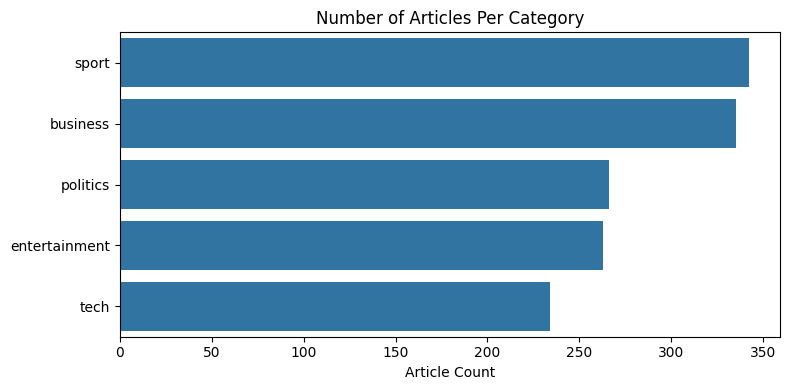

In [8]:
# Plot the number of articles per category
plt.figure(figsize=(8, 4))
sns.countplot(y='Category', data=train_df, order=train_df['Category'].value_counts().index)
plt.title('Number of Articles Per Category')
plt.xlabel('Article Count')
plt.ylabel(None)
plt.tight_layout()

> The bar chart shows that atricles are most often written about sports and business.

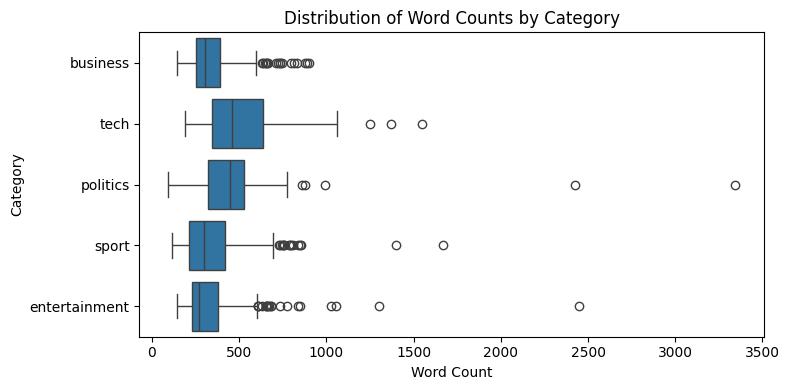

In [9]:
# Plot boxplot of word counts by category
plt.figure(figsize=(8, 4))
sns.boxplot(y='Category', x='word_count', data=train_df)
plt.title('Distribution of Word Counts by Category')
plt.xlabel('Word Count')
plt.tight_layout()

> - The boxplot indicates that articles in the `tech` and `politics` categories are longer because their median word counts are higher than the median word counts for the `business`, `tech`, and `entertainment` categories.  
> -  This make sense because I can imagine that technical and political articles would be longer and more in depth than the other types of documents.

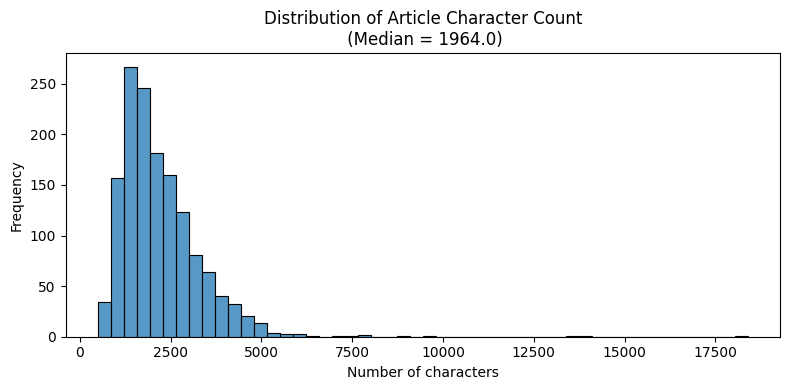

In [10]:
# Plot the article character count distribution
plt.figure(figsize=(8, 4))
sns.histplot(train_df['char_count'], bins=50)
plt.title(f'Distribution of Article Character Count\n (Median = {train_df['char_count'].median()})')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.tight_layout()

> It appears that the median number of characters over all of the articles in the testing dataset is 1,964.

### 1.3 Extract Word Features

Text(0.5, 0, 'Frequency')

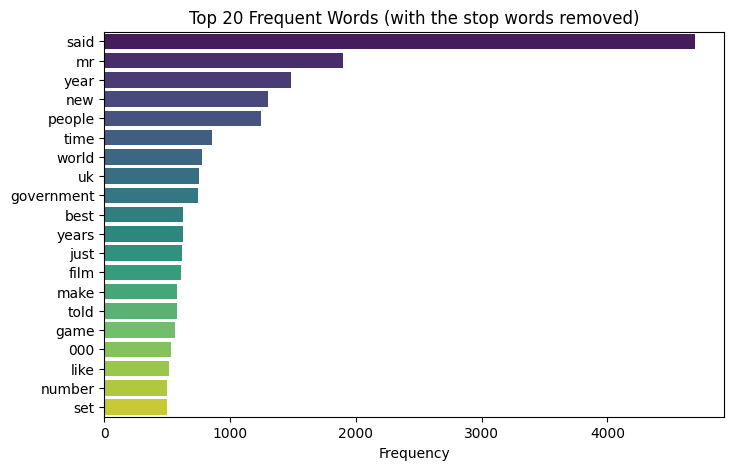

In [ ]:
# Finding the top words for all documents
cv = CountVectorizer(stop_words='english')
word_counts = cv.fit_transform(train_df['Text'].str.lower())
total_counts = word_counts.sum(axis=0)
words = cv.get_feature_names_out()
word_freq = dict(zip(words, np.array(total_counts).flatten()))

# Get top 20 words
top_words = heapq.nlargest(20, word_freq, key=word_freq.get)
top_counts = [word_freq[w] for w in top_words]

# Plot the top words
plt.figure(figsize=(8, 5))
sns.barplot(x=top_counts, y=top_words, hue=top_words, palette='viridis')
plt.title('Top 20 Frequent Words (with the stop words removed)')
plt.xlabel('Frequency')

In [ ]:
# TF‑IDF vectorisation
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(train_df['Text'])

# Apply NMF with 5 components (number of categories in unique_topics)
n_topics = len(unique_topics)
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in zip(unique_topics, H):
    top_indices = topic.argsort()[::-1][:20]
    top_words = [feature_names[i] for i in top_indices]
    print(f'{topic_idx}: {", ".join(top_words)}')


business: england, game, win, wales, ireland, cup, said, team, play, france, match, players, half, time, final, chelsea, injury, coach, world, season
tech: mr, labour, election, blair, brown, party, said, government, minister, howard, prime, tax, chancellor, tory, tories, campaign, lib, kennedy, leader, britain
politics: growth, said, economy, sales, economic, year, bank, market, 2004, oil, dollar, china, rates, prices, rate, shares, india, rise, firm, figures
sport: film, best, awards, award, actor, actress, films, won, oscar, director, festival, star, comedy, nominated, nominations, british, year, aviator, ceremony, named
entertainment: mobile, people, music, said, phone, broadband, technology, users, phones, digital, net, microsoft, software, use, service, online, tv, new, search, video


The NMF model uncovers latent topics by factorising the TF‑IDF matrix into non‑negative components.  Each topic is represented by a set of high‑weight words.  In our case, the topics align closely with the five news categories: one topic contains sports terms like *england*, *game* and *win*; another contains political terms like *labour*, *election* and *blair*; a business topic includes words like *growth* and *economy*; an entertainment topic contains *film*, *awards* and *actor*; and a technology topic includes *mobile*, *music* and *phone*.  This alignment suggests that TF‑IDF combined with NMF captures meaningful structure in the corpus.

## 2. Discussion of embedding methods and plan of analysis

Several techniques can convert raw text into numeric features:

* **Term Frequency–Inverse Document Frequency (TF‑IDF)** weighs each term according to how often it appears in a document and how rare it is across the corpus.  Terms that are frequent in a document but rare overall receive higher weights, which often improves discrimination.
* **Word2Vec** trains a shallow neural network to predict context words (skip‑gram) or predict a word from its context (CBOW).  After training, semantically similar words have similar vectors.
* **GloVe** constructs a global co‑occurrence matrix and factorises it so that the dot product of two word vectors approximates the log probability of the words appearing together.  GloVe embeddings capture both local and global context.

For this project we choose TF‑IDF followed by NMF.  Unlike Word2Vec or GloVe, TF‑IDF does not require a large corpus to learn useful representations.  NMF reduces the high‑dimensional TF‑IDF matrix to a handful of interpretable topics that align with the news categories.  The resulting features will serve as inputs to a classifier in the next stage of the project.

## 3. Data cleaning and next steps

Before training a model we will:
1. **Convert to lower case and remove punctuation** to reduce vocabulary size.
2. **Remove stop words and apply lemmatisation or stemming** to reduce inflected forms.
3. **Drop duplicate texts** to avoid biasing the model.
4. **Vectorise** the cleaned corpus with TF‑IDF, limiting the vocabulary size.
5. **Apply NMF** to reduce dimensionality and extract latent topics.

Next we will train a classifier (e.g., logistic regression or SVM) on the NMF features, tune hyper‑parameters using cross‑validation, and evaluate accuracy and F1‑scores.
